This is my First kernel in kaggle. I'm also new to python. I learned a lot here.
In this post, I'm trying to convert the two geographic properties into more meaningful region labels  using KMean clustering. the 'regionidzip' properties has too many values, it is used to revise the clustering so that the boundaries are more meaning based on the regionidzip.

At the end, you will see that, the revised clustering suggested that, there's a few mislabeled 'regioinidzip' in the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
#load properties
#replace 'NaN' in regionidzip with 97000
#drop rows with 'NaN' in latitude & longitude

df = pd.read_csv('../input/properties_2016.csv')
df['regionidzip']=df['regionidzip'].fillna(97000)
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)
X=df.loc[:,['latitude','longitude']]
zp=df.regionidzip

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#run KMeans
id_n=8
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_

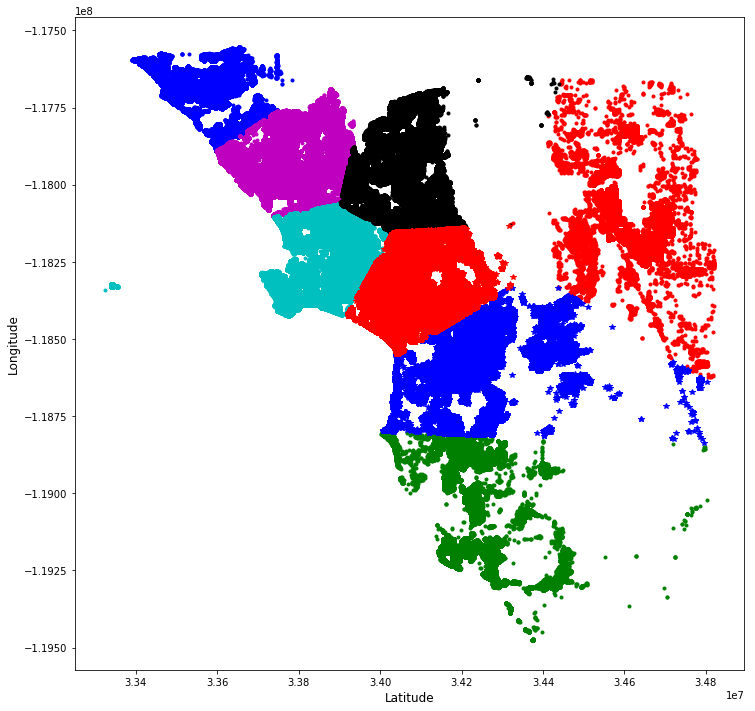

In [4]:
#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.latitude[cluster].values,X.longitude[cluster].values,ptsymb[i])
plt.show()

In [5]:
#revise the clustering based on zipcode
uniq_zp=np.unique(zp)
for i in uniq_zp:
    a=np.where(zp==i)[0]
    c = Counter(id_label[a])
    c.most_common(1)[0][0]
    id_label[a]=c.most_common(1)[0][0]

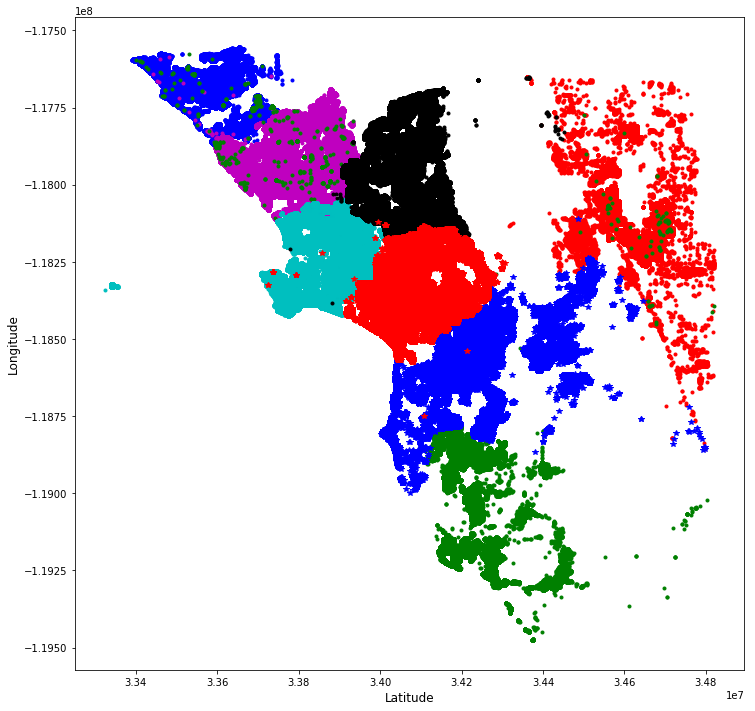

In [6]:
#plot result (revised)
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.latitude[cluster].values,X.longitude[cluster].values,ptsymb[i])
plt.show()